In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
def l2_distance(x_i, centroid):
    distance = 0
    for j in range(len(x_i)):
        distance += (x_i[j]-centroid[j])**2
#     distance += np.sum(np.power((centroid-x_i),2),1)
    return np.sqrt(distance)

In [3]:
def kmeans(x, NUM_K, maxIterations):
#     Initialize the cluster
    initial_centroids = x[np.random.choice(len(x),NUM_K,replace=False)]
    for it in range(maxIterations):
        if (it == 0):
            centroids = initial_centroids
        distances = np.zeros((len(x), NUM_K))
        for i in range(len(x)):
            x_i = x[i]
            for k in range(NUM_K):
                distances[i,k] += l2_distance(x_i, centroids[k])
        Labeled_idx = np.argmin(distances,1)
        
        new_centroids = []
        for k in range(NUM_K):
            k_idx = np.where(Labeled_idx==k)
#             print(k_idx)
            new_centroid = np.mean(x[k_idx],axis=0)
            new_centroids.append(new_centroid )
        new_centroids = np.array(new_centroids)
        if np.all(new_centroids == centroids):
            print(it)
            break
#             return initial_centroids, Labeled_idx
#             return initial_centroids, Labeled_idx
#             print(new_centroid.shape)
#         print(new_centroids)
#         if (it+1==iterations):
#             new_centroids = np.array(new_centroids)
#             new_distances = np.zeros((len(x), NUM_K))
#             for i in range(len(x)):
#                 x_i = x[i]
#                 for k in range(NUM_K):
#                     new_distances[i,k] += l2_distance(x_i, new_centroids[k])
#             New_Labeled_idx = np.argmin(new_distances,1)
        centroids = new_centroids
    return initial_centroids, Labeled_idx

In [4]:
def Gaussian_kernel(x_i, x_j, sigma):
    distance = l2_distance(x_i, x_j)
#     distance += np.sum(np.power((centroid-x_i),2),1)
    return np.exp(-1.0 * (distance**2) / (2 * sigma**2))


In [5]:
# def Cosine_Similarity(x_i, x_j):
#     cos_sim = dot(x_i, x_j) / (norm(x_i) * norm(x_j))
#     return cos_sim

In [6]:
def KNN_graph(data, kernel, sigma, K=5):
    n = len(data)
    W = np.zeros((n,n))
    for i in range(n):
        x_i = data[i]
        for j in range(n):
            x_j = data[j]
            W[i,j] = kernel(x_i, x_j, sigma)
        W[i,np.argsort(W[i])[0:(n-K)]] = 0

    W = (W+W.T)/2
    D_vector = np.zeros(n)
    for i in range(n):
        D_vector[i] += np.sum(W[i])
        
#     D = np.diag(D_vector)
    return W, D_vector

In [7]:
# def KNN_graph(data, kernel, K=5):
#     n = len(data)
#     W = np.zeros((n,n))
#     for i in range(n):
#         x_i = data[i]
#         for j in range(n):
#             x_j = data[j]
#             W[i,j] = kernel(x_i, x_j)
#         W[i,np.argsort(W[i])[0:(n-K)]] = 0

#     W = (W+W.T)/2
#     D_vector = np.zeros(n)
#     for i in range(n):
#         D_vector[i] += np.sum(W[i])
        
# #     D = np.diag(D_vector)
#     return W, D_vector

In [46]:
def Laplace_Matrix(W,D_vector):
    n = len(D_vector)
    D = np.diag(D_vector)
    L = D - W
    
    
    D_norm = np.linalg.inv(np.power(D, 0.5))
    L_norm = np.matmul(np.matmul(D_norm, L),D_norm)
    
#     D_norm = np.diag(1.0 / (D_vector ** (0.5)))
#     L_norm = np.dot(np.dot(D_norm, L), D_norm)

    return L_norm

In [47]:
def Ncut(L, k):
    eigvalue, eigvector = np.linalg.eig(L)
    
    index = np.argsort(eigvalue)
    return np.real(np.stack((eigvector[:,index[0]],eigvector[:,index[1]]),axis=1))

In [48]:
data = np.loadtxt('Data/elliptical.txt')
# data = np.loadtxt('Data/square.txt')
# data = np.loadtxt('Data/cho.txt')
# data = np.loadtxt('Data/iyer.txt')
print(len(data))
flag_line = data[:,1]
# print(flag_line)
neg1_list = []
for i in range(len(flag_line)):
    if (data[i,1] == -1):
        neg1_list.append(i)
data = np.delete(data, neg1_list, axis=0)
print(len(data))
print(data[:,1])
Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# PCA
pca = PCA(n_components=2).fit(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
data2D = pca.transform(scaled_data)

SIGMA = 1.
E, D_vector = KNN_graph(data2D, Gaussian_kernel, SIGMA)
# E, D_vector = KNN_graph(data, Cosine_Similarity)
L = Laplace_Matrix(E,D_vector)
H = Ncut(L, 2)
# H = normalization(H)

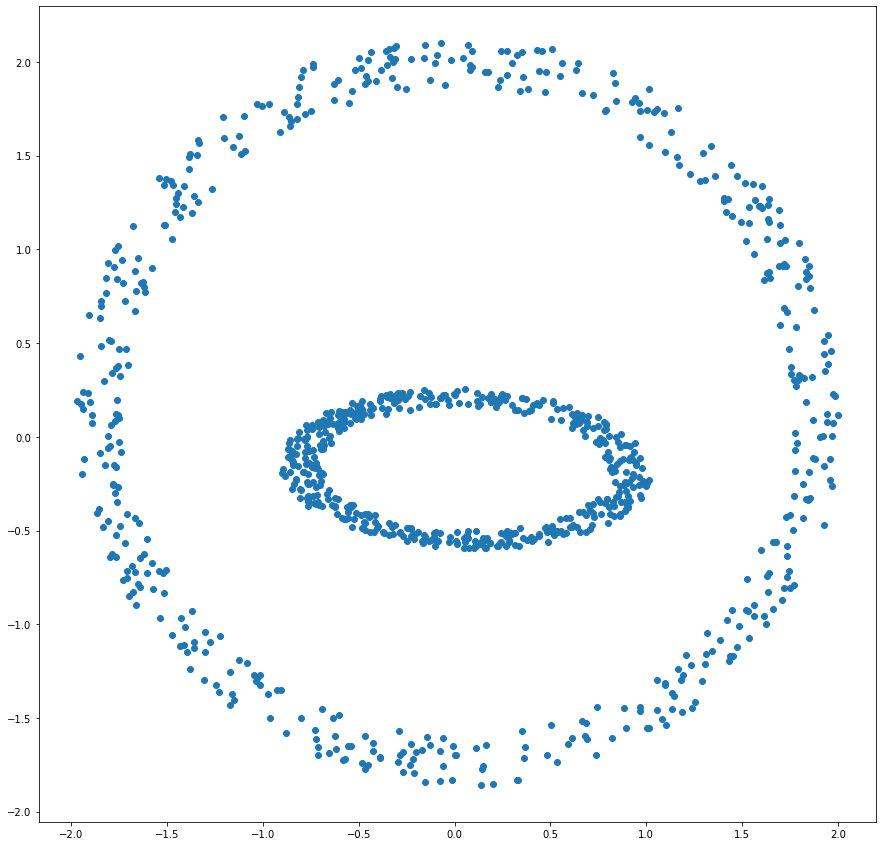

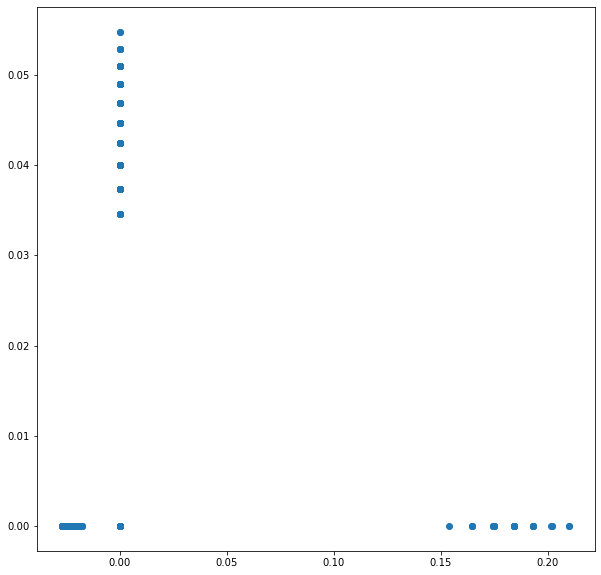

In [49]:
# print(data)
plt.figure(figsize=(15,15))
plt.scatter(data2D[:,0], data2D[:,1], label='0')
plt.show()
# print(F)
plt.figure(figsize=(10,10))
plt.scatter(H[:,0], H[:,1], label='0')
plt.show()

In [50]:
initial_centroids, labels = kmeans(H, 2, 40)



2


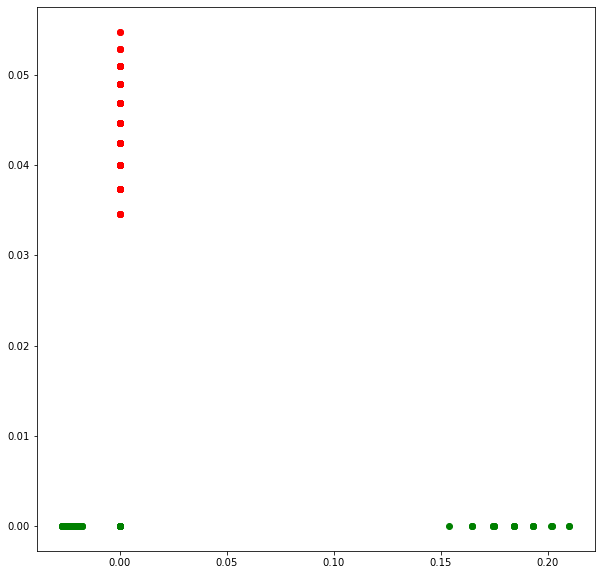

In [51]:
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'w', 'k', 'slateblue', 'slategray']
# colors = ['r', 'g', 'b', 'y', 'm']
idx ={}
for k in range(2):
    idx[str(k)]=[]
for i, k in enumerate(labels):
    idx[str(k)].append(i)
    
plt.figure(figsize=(10,10))    
for k in range(2):
    plt.scatter(H[idx[str(k)],0], H[idx[str(k)],1],marker='o',color=colors[k])

plt.show()

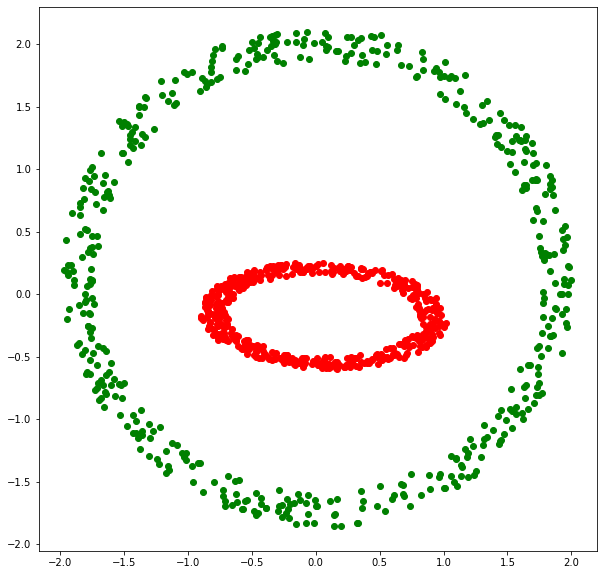

In [52]:
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'w', 'k', 'slateblue', 'slategray']
# colors = ['r', 'g', 'b', 'y', 'm']
idx ={}
for k in range(2):
    idx[str(k)]=[]
for i, k in enumerate(labels):
    idx[str(k)].append(i)
    
plt.figure(figsize=(10,10))    
for k in range(2):
    plt.scatter(data2D[idx[str(k)],0], data2D[idx[str(k)],1],marker='o',color=colors[k])

plt.show()

In [28]:
# Spectral on cho dataset
truth = data[:,1]
k_labels = labels  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]

# print(truth)
# print(np.unique(k_labels))
# print(np.unique(truth))
# print(k_labels)
# print(k_labels_matched)

accuracy_score(k_labels_matched, truth)



ValueError: Classification metrics can't handle a mix of binary and continuous targets